# GeoHab: Data exploration


## Getting started
Create a venv with python, 'python -m venv venv'
Install requirements.txt



In [34]:
import rasterio as rs
from matplotlib import pyplot as plt
import os
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


src_folder_path = os.path.abspath('..')
project_folder_path = Path(src_folder_path).resolve().parents[0]


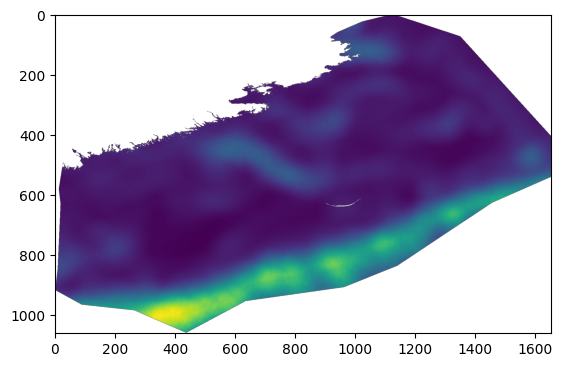

In [2]:
current_max = rs.open(project_folder_path.joinpath(r'data\auxiliary_data\current_max.tif'))

plt.imshow(current_max.read(1))
plt.show()

In [3]:
#Reading in train set
import pandas as pd
data_path = project_folder_path.joinpath(r'data\train.csv')
df = pd.read_csv(data_path)



In [4]:
df.head()

,id,mean_gs,sd,skewness,kurtosis,current_max,current_mean,current_min,gebco,x,y,sample_type
0,1,2.48,1.33,3.70,24.33,0.164273,0.156398,0.146120,-227,-60.09194,43.57372,Grab Van Veen
1,2,4.15,1.82,2.34,9.43,0.116663,0.101989,0.092233,-17,-60.05735,43.91429,Grab Video
2,3,1.79,0.98,4.16,26.64,0.116663,0.101989,0.092233,-17,-60.05735,43.91429,Grab Video
3,4,1.58,0.75,5.16,45.76,0.106330,0.091203,0.081784,-18,-60.09058,43.91506,Grab Video
4,5,0.85,1.16,1.04,15.00,0.106330,0.091203,0.081784,-18,-60.08782,43.91469,Grab Video


Text(0.5, 1.0, 'Distribution of gs')

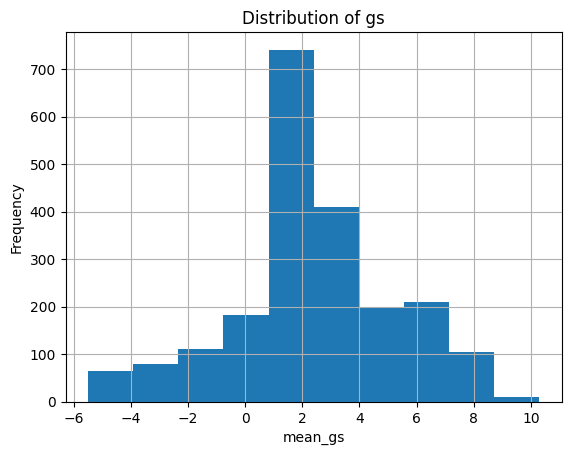

In [5]:
# Histogram of mean grainsize



df['mean_gs'].hist()

plt.xlabel('mean_gs')
plt.ylabel('Frequency')
plt.title('Distribution of gs')


Inspect current and grain size

In [23]:
# bin together grain size
bin_size = 25
df['mean_gs_bined'] = pd.cut(df['mean_gs'], bin_size, labels=range(0,bin_size))

In [24]:
df['mean_gs_bined'] 

0       12
1       15
2       11
3       11
4       10
        ..
2105    11
2106    11
2107    13
2108     9
2109    12
Name: mean_gs_bined, Length: 2110, dtype: category
Categories (25, int64): [0 < 1 < 2 < 3 ... 21 < 22 < 23 < 24]

In [25]:
fig= px.violin(df, y="current_mean",x = "mean_gs_bined", points="all",
          hover_data=df.columns, title="Current for eached binned grain size")
fig.show() 

In [26]:
fig= px.violin(df, y="gebco",x = "mean_gs_bined", points="all",
          hover_data=df.columns, title="Distribution of depth for each bin")
fig.show() 

Hmmm... hva med å se på gradients? 


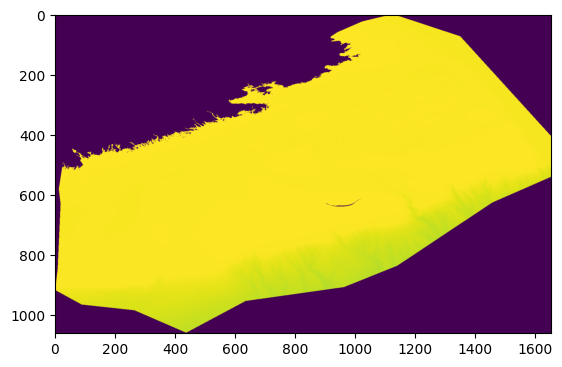

[[-32768 -32768 -32768 ... -32768 -32768 -32768]
 [-32768 -32768 -32768 ... -32768 -32768 -32768]
 [-32768 -32768 -32768 ... -32768 -32768 -32768]
 ...
 [-32768 -32768 -32768 ... -32768 -32768 -32768]
 [-32768 -32768 -32768 ... -32768 -32768 -32768]
 [-32768 -32768 -32768 ... -32768 -32768 -32768]]


In [30]:
gebco = rs.open(project_folder_path.joinpath(r'data\auxiliary_data\gebco.tif'))

depth = gebco.read(1)

plt.imshow(depth)
plt.show()



32422.0
-29723.0


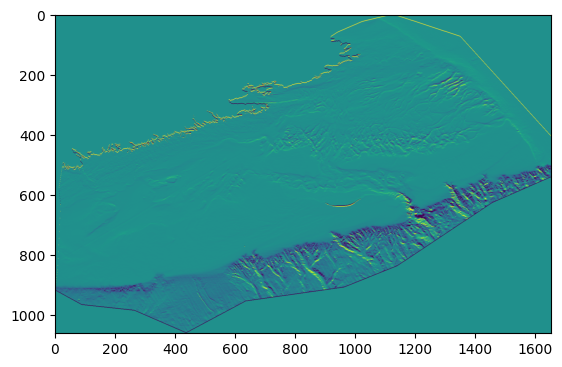

In [49]:
grad_max = np.abs(depth[0,0]+426) #(ish)
#
grad_new_max= 100
grad_new_min = -100

(grad_depth_x, grad_depth_y) = np.gradient(depth)
print(grad_depth_x.max())
print(grad_depth_x.min())
grad_depth_x[grad_depth_x>grad_new_max] =grad_new_max
grad_depth_x[grad_depth_x<grad_new_min] =grad_new_min
plt.imshow(grad_depth_x)
plt.show()

